In [1]:
def plot_settings(style='seaborn-whitegrid'):
    """
    Common rcParams for plot styling
    """
    import matplotlib as mpl
    
    mpl.style.use(style)
    mpl.rcParams['font.weight']= 'bold'
    mpl.rcParams['font.size']= 16

In [2]:
import pandas as pd
from quilt.data.hsiaoyi0504 import aeolus_top5drugs

%matplotlib inline

data = pd.read_feather(aeolus_top5drugs.aeolus_top5drugs._data())

/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
def freqXbyY(data,x = 'drug_concept_id',y = 'report_year'):
    """
    helper groupby x and count y method
    """
    
    return data.groupby(x)[y].count()

In [4]:
grpd = freqXbyY(data,'drug_concept_id','id')

In [5]:
import ipywidgets as w

In [6]:
drugs = grpd.index.values
d = w.Dropdown(options = drugs,layout=w.Layout(width='30%', display='flex'))

In [7]:
def dropdown(series,layout=None):
    """
    Helper for pywidget dropdown
    
    Takes in series
    """
    
    import ipywidgets as w
    
    arr = series.index.values

    if layout is None:
        layout = w.Layout(width='30%', display='flex')
    
    return w.Dropdown(options = drugs,layout=layout)

In [8]:
dropdown(grpd)

Dropdown(layout=Layout(display='flex', width='30%'), options=(923645, 956874, 1112807, 1125315, 1501700), valu…

In [9]:
def filtXfreqYbyZ(data,label,x,y,z):
    """
    filter by the label in x within the dataframe
    
    use freqXbyY helper method
    """
    
    tmp = data.query('{0}==@label'.format(x))
    
    return freqXbyY(tmp,y,z)

In [10]:
ac_grpd = filtXfreqYbyZ(data,label=d.label,x='drug_concept_id',y='age_cat',z='age_cat')

In [11]:
plot_settings()

In [12]:
def plot(series,kind):
    """
    helper for plotting
    """
    
    series.plot(kind=kind)

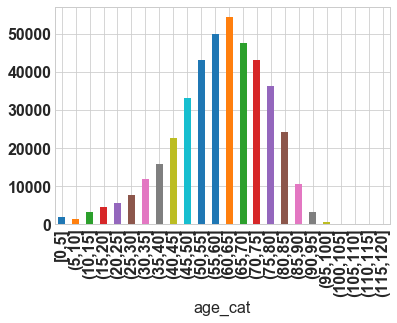

In [13]:
plot(ac_grpd,'bar')